# Calories_Burn_Prediction

In today's world, people are having very tight schedules due to the changes in their lifestyles and work 
commitments. But it requires regular physical activity to stay fit and healthy. People do not concentrate on their food 
habits, leading to obesity. Obesity is becoming a major and common problem in today’s lifestyle. This leads people to 
choose their diet and do an equal amount of exercise to stay fit and healthy. The main part here is people should have
adequate knowledge about their calorie intake and burn, keeping a track of their calorie intake is easy as it's available 
on the product label or on the internet. Keeping track of calories burnt is a difficult part as there are very few devices 
for that. Calories burned by an individual are based on MET charts and formulas. The main agenda of this  is a
prediction of the burnt calories with the help of a regression model as the ML (machine learning) algorithms 
to show accurate results. The model is fed with more than 15,000 data and its mean absolute error is 2.7 which will 
become better over time by feeding the XG boost regression model with more data.
The variables used here are the timescale the person is training, the average heart rate per minute, and the 
temperature. Then get more height, weight, gender, and age of the person to predict the tonnage of energy that the
person burns. Parameters that can be considered for input are the durationof exercise, average heart rate per minute,
temperature, height, weight, and gender. A machine learning algorithms are used to predict calories 
burned depending on exercise time, temperature, height, weight, and age.

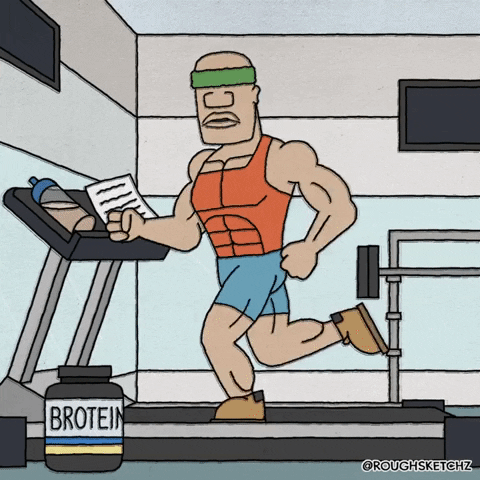

## Attribute Function

Gender :Gender (female : 1, male : 0)
    
Age :Age is mentioned in years
    
Height : Height of the person
    
Weight : Weight of the person
    
Heart_rate:  Average heart rate of an individual during the workout(Normal heart rate 75
beats/min)
    
Body_temp : Average body temperature captured in the course of entireworkout (greater
than 37 degree Celsius)
                                                                            
Duration : Duration of exercising in minutes.
    
Calories : The total amount of calories burned while workout
    

In [4]:
# we will start with importing different libraries

# Exploratory Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# Standardization
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

     
# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
exercise=pd.read_csv('exercise.csv')
exercise

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68     190      94        29         105       40.8
1      14861698  female   20     166      60        14          94       40.3
2      11179863    male   69     179      79         5          88       38.7
3      16180408  female   34     179      71        13         100       40.5
4      17771927  female   27     154      58        10          81       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20     193      86        11          92       40.4
14996  17212577  female   27     165      65         6          85       39.2
14997  17271188  female   43     159      58        16          90       40.1
14998  18643037    male   78     193      97         2          84       38.3
14999  11751526    male   63     173      79        18          92       40.5

[15000 rows x 8 columns]

In [6]:
calories=pd.read_csv('calories.csv')
calories

User_ID  Calories
0      14733363       231
1      14861698        66
2      11179863        26
3      16180408        71
4      17771927        35
...         ...       ...
14995  15644082        45
14996  17212577        23
14997  17271188        75
14998  18643037        11
14999  11751526        98

[15000 rows x 2 columns]

In [7]:
data = pd.concat([exercise,calories.Calories],axis=1)
data

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68     190      94        29         105       40.8   
1      14861698  female   20     166      60        14          94       40.3   
2      11179863    male   69     179      79         5          88       38.7   
3      16180408  female   34     179      71        13         100       40.5   
4      17771927  female   27     154      58        10          81       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20     193      86        11          92       40.4   
14996  17212577  female   27     165      65         6          85       39.2   
14997  17271188  female   43     159      58        16          90       40.1   
14998  18643037    male   78     193      97         2          84       38.3   
14999  11751526    male   63     173      79        18          92       40.5   

       Calories  
0           231  
1            66  
2            26  
3            71  
4            35  
...         ...  
14995        45  
14996        23  
14997        75  
14998        11  
14999        98  

[15000 rows x 9 columns]

## DATA OVERVIEW

In [8]:
data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68     190      94        29         105       40.8   
1  14861698  female   20     166      60        14          94       40.3   
2  11179863    male   69     179      79         5          88       38.7   
3  16180408  female   34     179      71        13         100       40.5   
4  17771927  female   27     154      58        10          81       39.8   

   Calories  
0       231  
1        66  
2        26  
3        71  
4        35

In [9]:
data.tail()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
14995  15644082  female   20     193      86        11          92       40.4   
14996  17212577  female   27     165      65         6          85       39.2   
14997  17271188  female   43     159      58        16          90       40.1   
14998  18643037    male   78     193      97         2          84       38.3   
14999  11751526    male   63     173      79        18          92       40.5   

       Calories  
14995        45  
14996        23  
14997        75  
14998        11  
14999        98

In [7]:
data.shape

(15000, 9)

## DATA INFORMATION

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
print(data.dtypes)

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object


### INDEPENDENT AND DEPENDENT FEATURES:

In [12]:
# Independent features
x = data[['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]

# Dependent feature
y= data[['Calories']]

### LABELING OF DATA

In [11]:
# Observation :As the gender feature contains categorical data,
# Perform label encoding

In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Gender' column
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Now 'male' is encoded as 0 and 'female' is encoded as 1


In [14]:
data

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       1   68     190      94        29         105       40.8   
1      14861698       0   20     166      60        14          94       40.3   
2      11179863       1   69     179      79         5          88       38.7   
3      16180408       0   34     179      71        13         100       40.5   
4      17771927       0   27     154      58        10          81       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       0   20     193      86        11          92       40.4   
14996  17212577       0   27     165      65         6          85       39.2   
14997  17271188       0   43     159      58        16          90       40.1   
14998  18643037       1   78     193      97         2          84       38.3   
14999  11751526       1   63     173      79        18          92       40.5   

       Calories  
0           231  
1            66  
2            26  
3            71  
4            35  
...         ...  
14995        45  
14996        23  
14997        75  
14998        11  
14999        98  

[15000 rows x 9 columns]

### STATISTICAL FEATURES OF DATA

In [15]:
data.describe().T

count          mean           std         min          25%  \
User_ID     15000.0  1.497736e+07  2.872851e+06  10001159.0  12474190.75   
Gender      15000.0  4.964667e-01  5.000042e-01         0.0         0.00   
Age         15000.0  4.278980e+01  1.698026e+01        20.0        28.00   
Height      15000.0  1.744651e+02  1.425811e+01       123.0       164.00   
Weight      15000.0  7.496687e+01  1.503566e+01        36.0        63.00   
Duration    15000.0  1.553060e+01  8.319203e+00         1.0         8.00   
Heart_Rate  15000.0  9.551853e+01  9.583328e+00        67.0        88.00   
Body_Temp   15000.0  4.002545e+01  7.792299e-01        37.1        39.60   
Calories    15000.0  8.953953e+01  6.245698e+01         1.0        35.00   

                   50%          75%         max  
User_ID     14997285.0  17449278.75  19999647.0  
Gender             0.0         1.00         1.0  
Age               39.0        56.00        79.0  
Height           175.0       185.00       222.0  
Weight            74.0        87.00       132.0  
Duration          16.0        23.00        30.0  
Heart_Rate        96.0       103.00       128.0  
Body_Temp         40.2        40.60        41.5  
Calories          79.0       138.00       314.0

## KNOWING YOUR DATASET

### Checking null values

In [16]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [16]:
# Hence ,there are no null  values present in the dataset

### Checking duplicates count:

In [17]:
data.duplicated().sum()

0

In [18]:
# There are no duplicates present in the data.

## UNDERSTANDING THE VARIABLES

In [17]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

## EDA 

In [18]:
# separating the dataset into dependent & independent variable.
     
X=data[['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp',]]         # Independent variables.
Y=data['Calories']                       # Dependent variables.

In [19]:
X.shape

(15000, 8)

In [20]:
Y.shape

(15000,)

##  DATA DISTRIBUTION

## Checking Skewness of the dataset

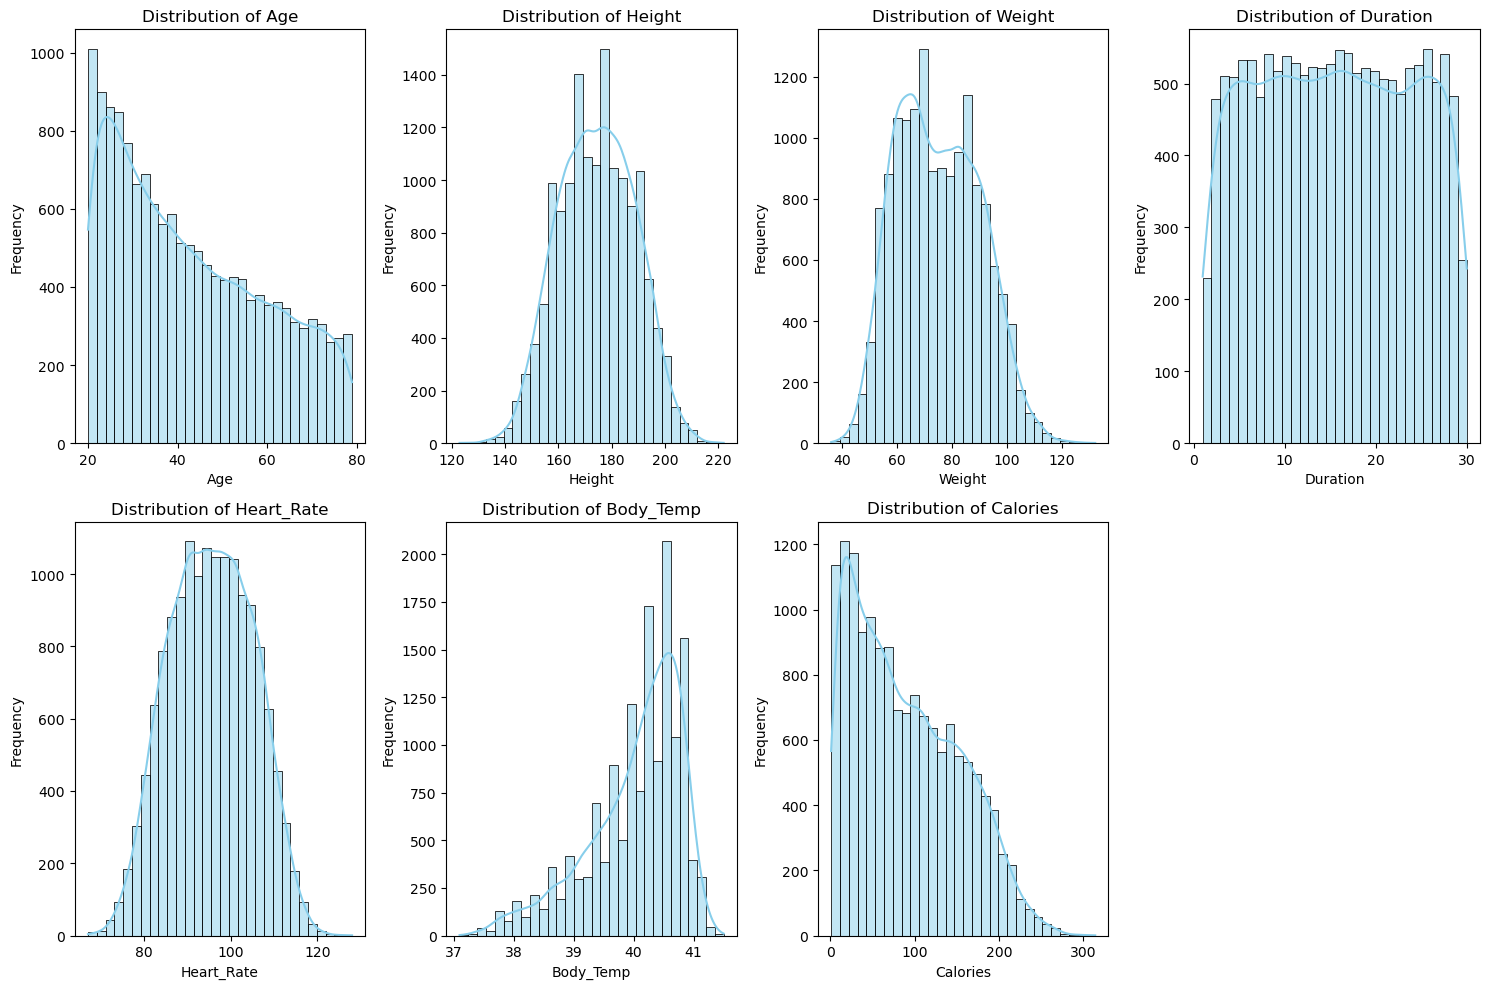

In [21]:
# List of numeric features
numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

# Create individual histograms for each numeric feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[feature], kde=True, color='skyblue', bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


In [24]:
# By above analysis we can conclude the following things:
# Body_Temp is left_skewed (negative skewness)
# Colaries is Right_skewed ( positive skewness)


### Box-Cox transformation  technique

In [25]:
## Applying Box-Cox transformation  technique: 1)It handles both positive and negative skewness
#                                              2) includes the log transformation and the square root transformation .

In [22]:
# Applying  Box-Cox transformation to the 'Body_Temp' column
transformed_body_temp, lambda_value = stats.boxcox(data['Body_Temp'])

# Updating  the 'Body_Temp' column with the transformed values
data['Body_Temp'] = transformed_body_temp

# Print the lambda value (the power transformation factor)
print("Lambda value (optimal power transformation factor):", lambda_value)


Lambda value (optimal power transformation factor): 23.33997545219827


In [23]:
# Applying  Box-Cox transformation to the 'Calories' column
transformed_body_temp, lambda_value = stats.boxcox(data['Calories'])
# Updating the 'Calories' column with the transformed values
data['Calories'] = transformed_body_temp
print("Lambda value (optimal log transformation factor):", lambda_value)

Lambda value (optimal log transformation factor): 0.4538948554411874


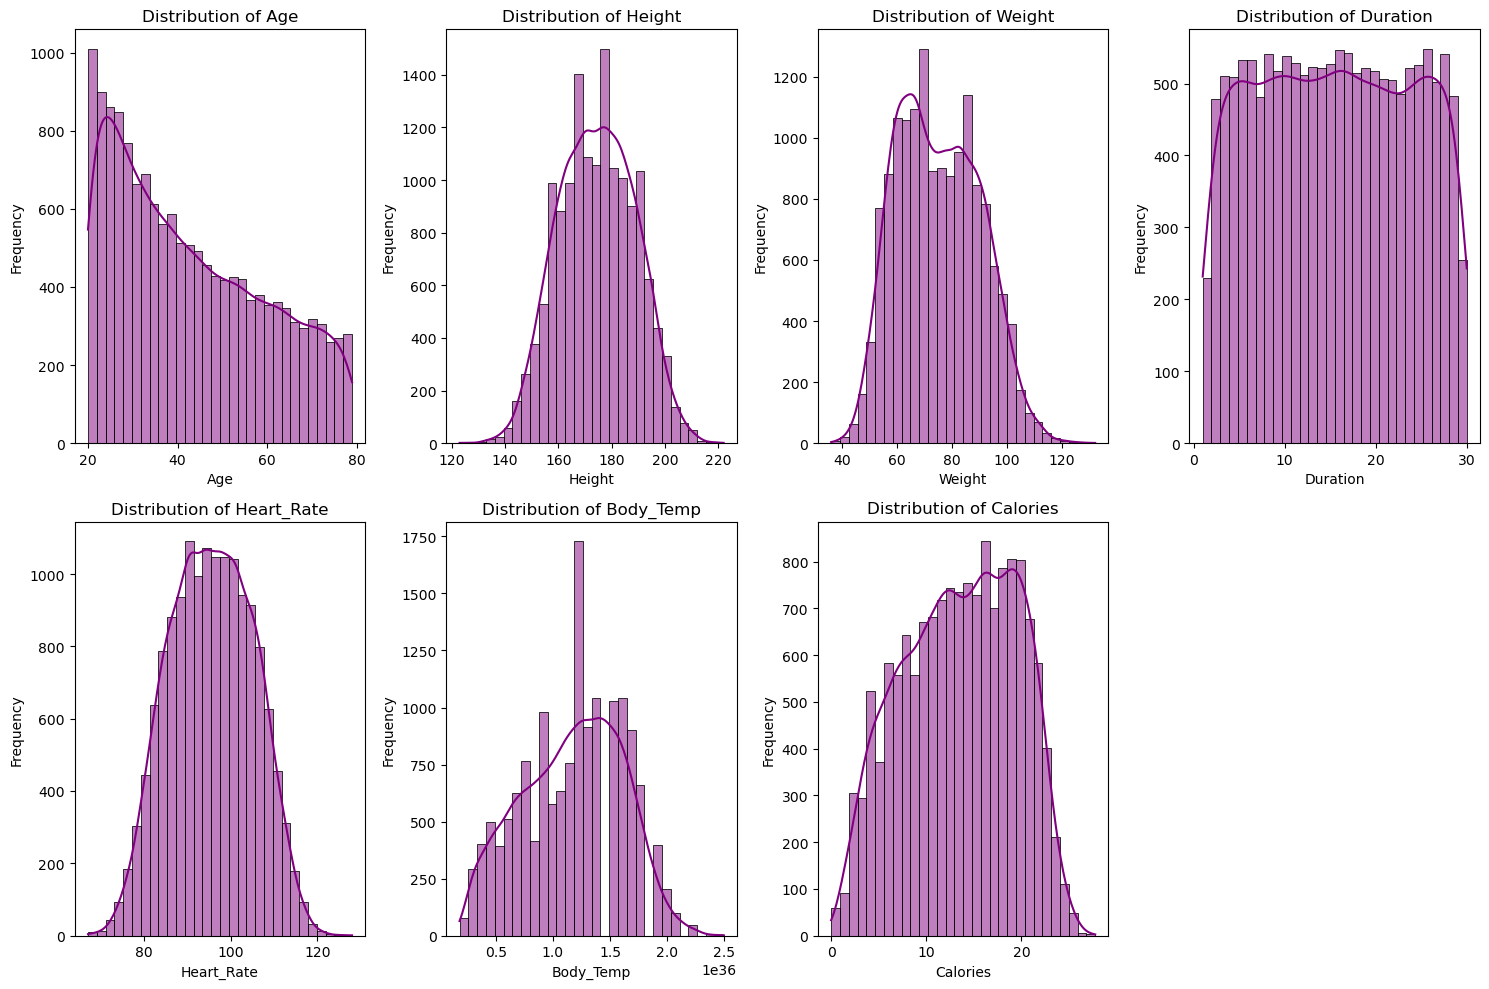

In [24]:
# List of numeric features
numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

# Create individual histograms for each numeric feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[feature], kde=True, color='purple', bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [29]:
# Now all the features in the dataset are Normally Distributed:

## CORRELATION ANALYSIS

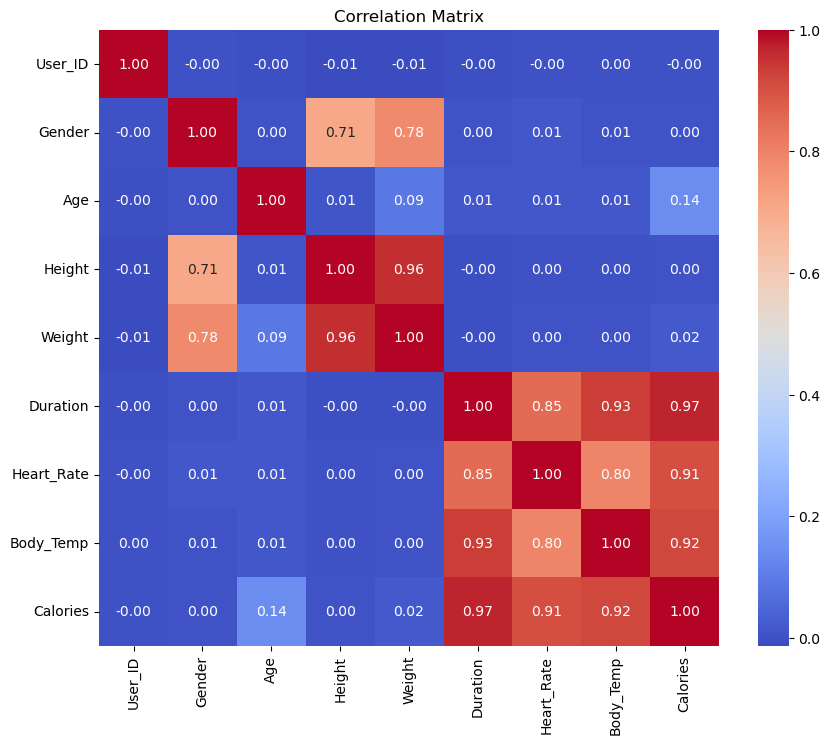

In [25]:
# Correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### VARIATION INFLATION FACTOR

In [31]:
# VARIATION INFLATION FACTOR: For dependent variables:

# Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.
# Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.
# This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [26]:
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = data.columns
  vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data. shape[1])]

  return(vif)

calculate_vif(data[[i for i in data.describe().columns]])

variables        VIF
0     User_ID   0.230253
1      Gender   0.894625
2         Age   0.568383
3      Height   0.051398
4      Weight   0.246503
5    Duration   5.726898
6  Heart_Rate   0.125833
7   Body_Temp  66.017838
8    Calories   6.325460

### ANALYZING RELATIONSHIPS

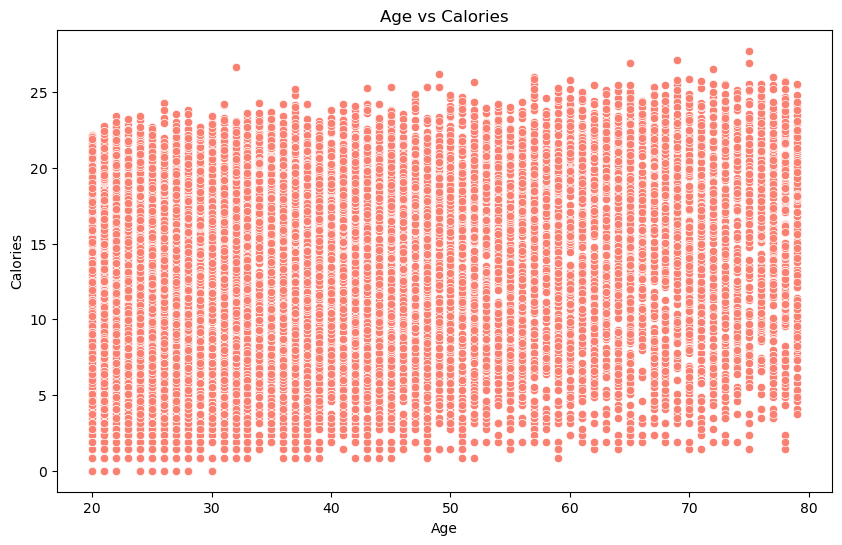

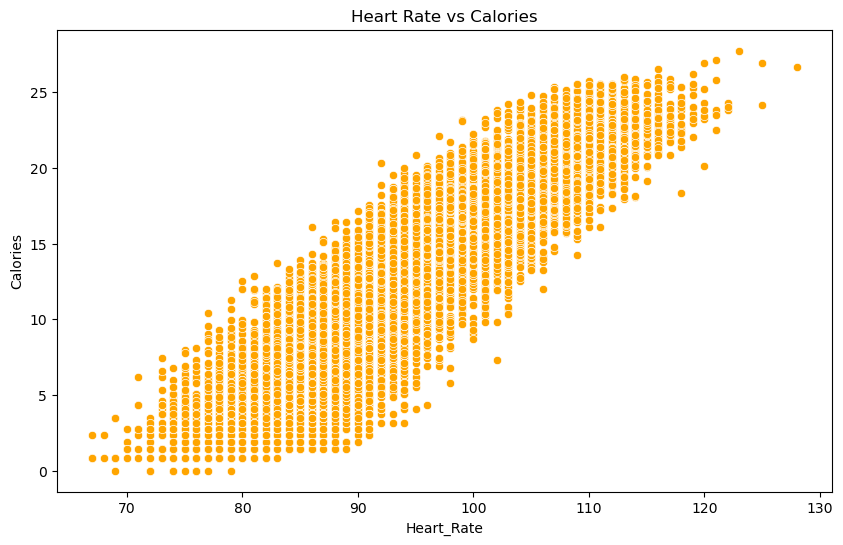

In [27]:
# Relationship between Age and Calories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Calories', data=data,color='salmon')
plt.title('Age vs Calories')
plt.show()

# Relationship between Heart Rate and Calories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart_Rate', y='Calories', data=data,color='orange')
plt.title('Heart Rate vs Calories')
plt.show()


### OUTLIERS DETECTION

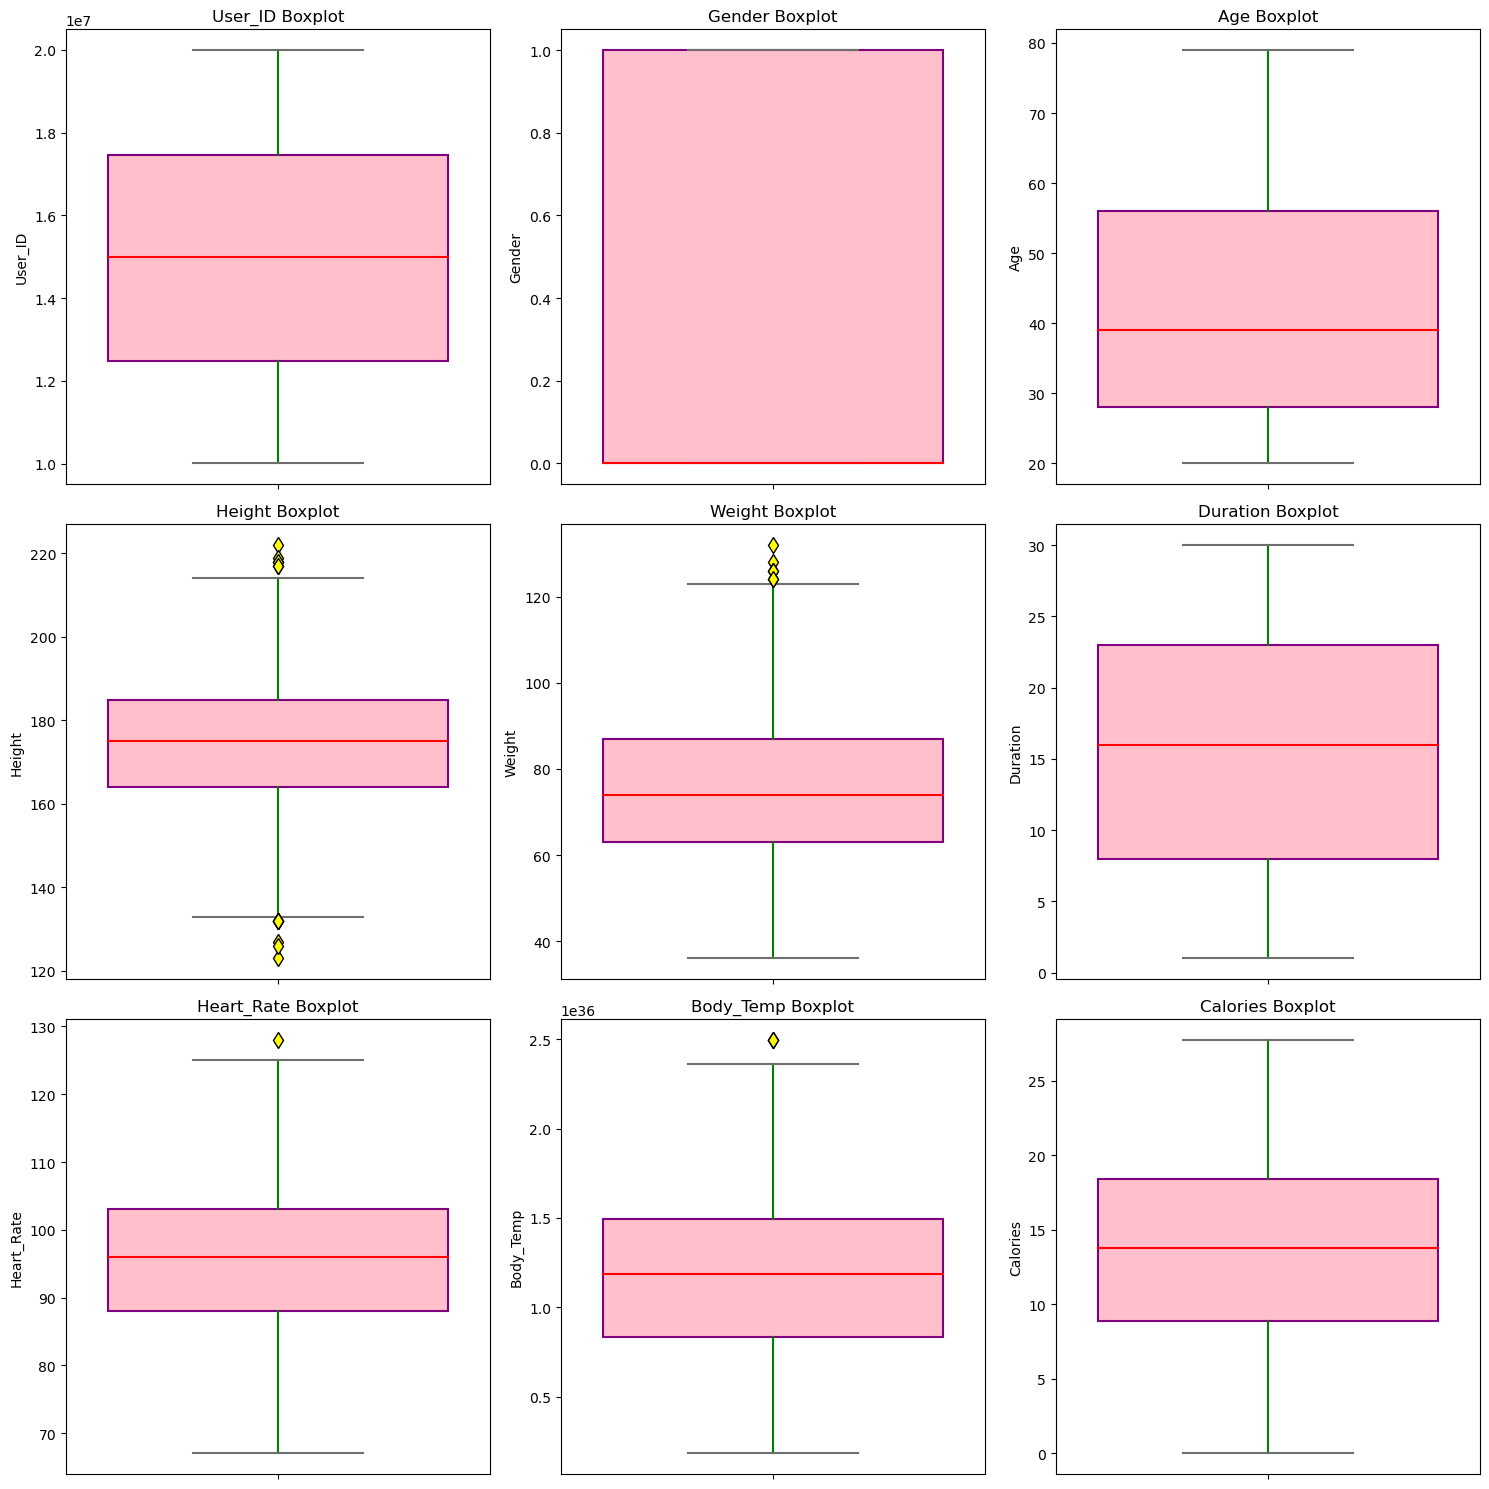

In [28]:
# Get the list of all features in the dataset
features = data.columns

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Generate box plots for all features
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(y=feature, data=data, ax=axes[row, col],color='skyblue', 
            boxprops=dict(facecolor='pink', edgecolor='purple'),  # Box color and border color
            whiskerprops=dict(color='green'),  # Whisker color
            medianprops=dict(color='red'),  # Median line color
            flierprops=dict(markerfacecolor='yellow', markeredgecolor='black', markersize=8)  # Outliers color and style
           )
    axes[row, col].set_title(f'{feature} Boxplot')

# Remove empty subplots if the number of features is not a multiple of num_cols
for i in range(len(features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [35]:
## Hence we can conclude that the outliers present  in the features: Height, Weight, Heat_Rate, Body_Temp of the dataset.

### Method to deal with an outliers:

In [29]:
features_to_calculate_iqr = ['Height', 'Weight', 'Heart_Rate', 'Body_Temp']

# Calculate and print IQR for specified features
for feature in features_to_calculate_iqr:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    print(f'IQR for {feature}: {iqr}')


IQR for Height: 21.0
IQR for Weight: 24.0
IQR for Heart_Rate: 15.0
IQR for Body_Temp: 6.600155686010066e+35


### Replacing the outliers with the Median of the feature

In [30]:
# Defining lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
# Replacing outliers with the median of the feature
data[feature] = data[feature].apply(lambda x: data[feature].median() if x < lower_bound or x > upper_bound else x)

# Now, outliers in specified features have been replaced with the median

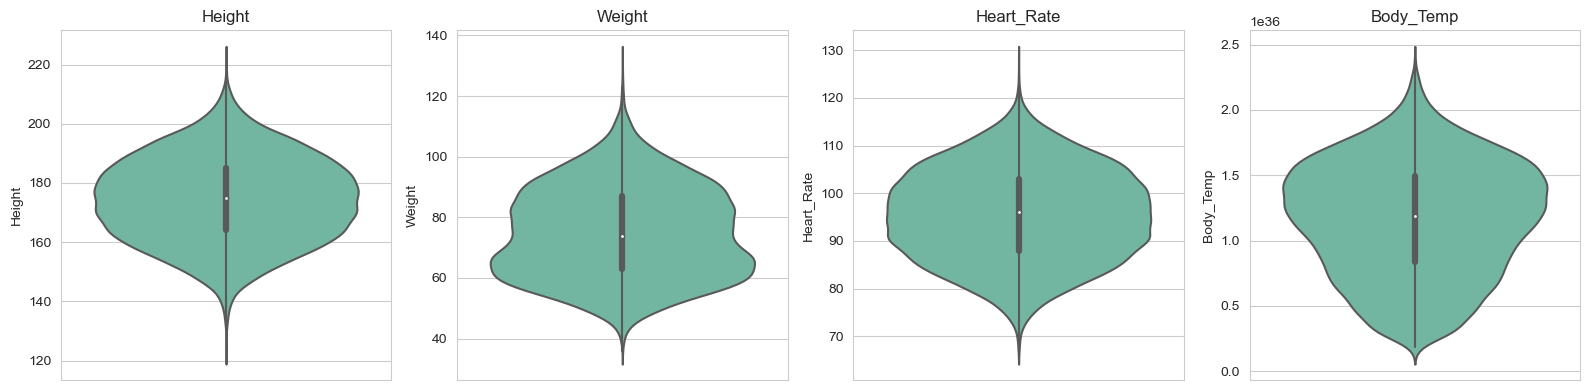

In [31]:
# Specifing  the features after replacing outliers
features_to_visualize = ['Height', 'Weight', 'Heart_Rate', 'Body_Temp']

# Set a custom color palette
sns.set_palette("Set2")

# Set the style
sns.set_style("whitegrid")


# Set the number of columns for subplots
num_cols = len(features_to_visualize)

# Create a single row with multiple columns for violin plots
plt.figure(figsize=(4*num_cols, 4))
for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(1, num_cols, i)
    sns.violinplot(y=data[feature],)
    plt.title(feature)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
## Hence all outliers has removed and replaced by the Median of their features.

## GENDER BASED ANALYSIS

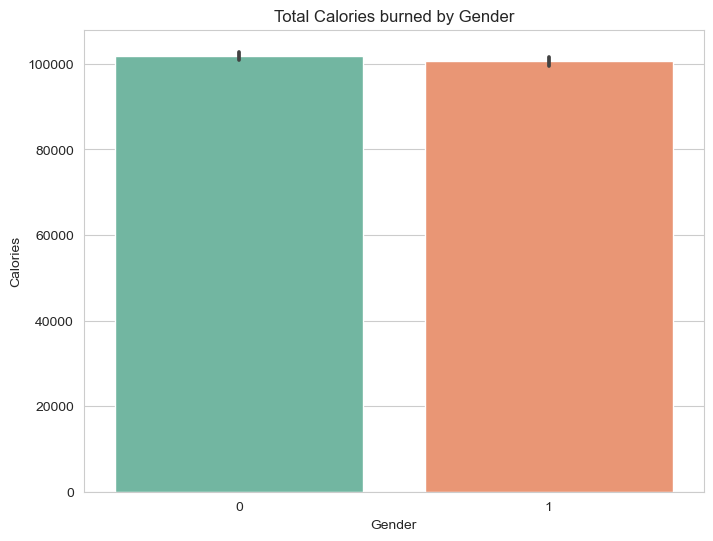

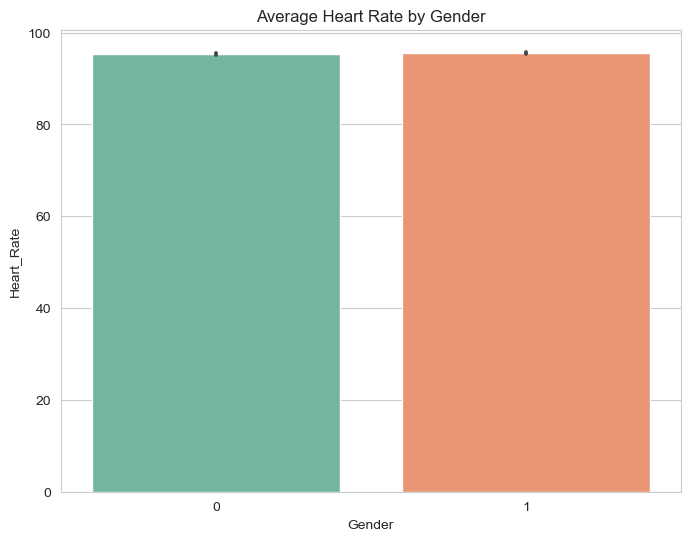

In [32]:
# Calories burned by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Calories', data=data, estimator=sum,)
plt.title('Total Calories burned by Gender')
plt.show()

# Average Heart Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Heart_Rate', data=data)
plt.title('Average Heart Rate by Gender')
plt.show()


## UNIVARIATE ANALYSIS

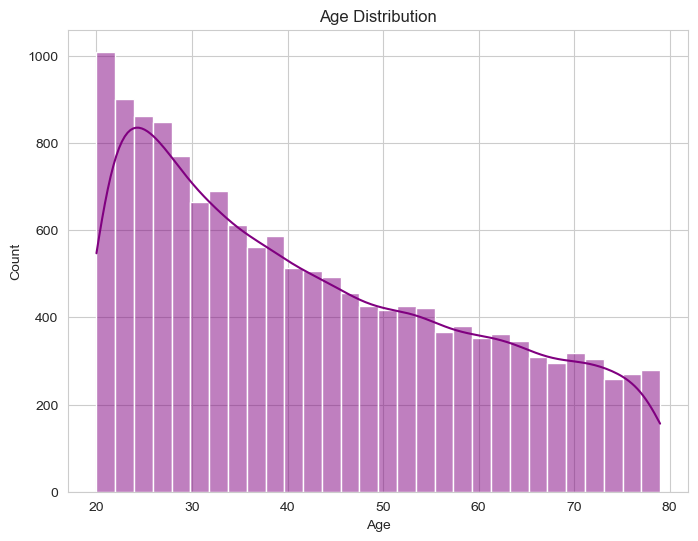

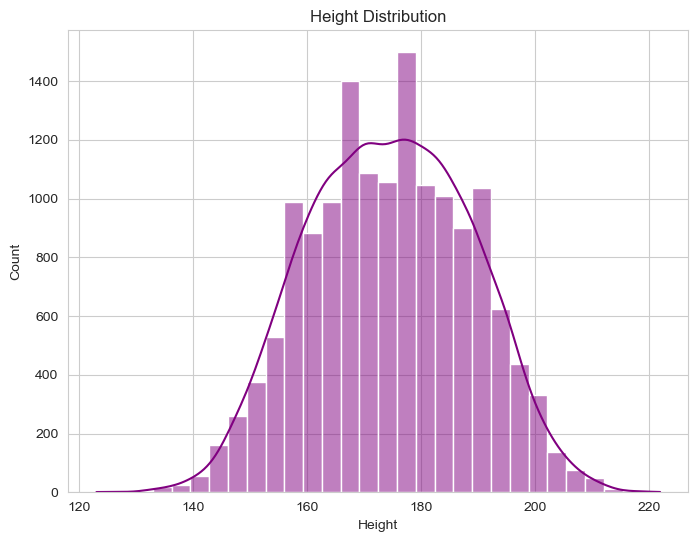

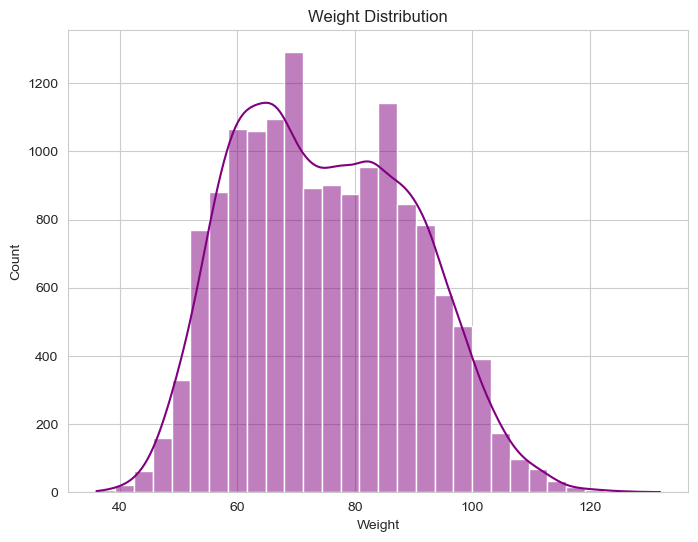

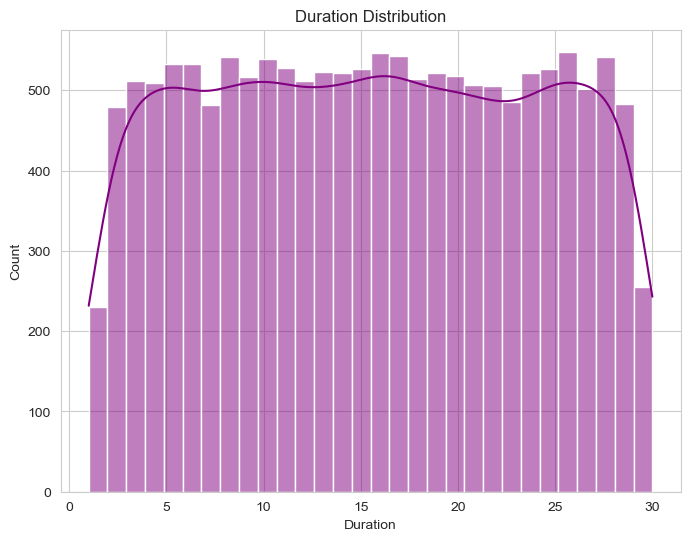

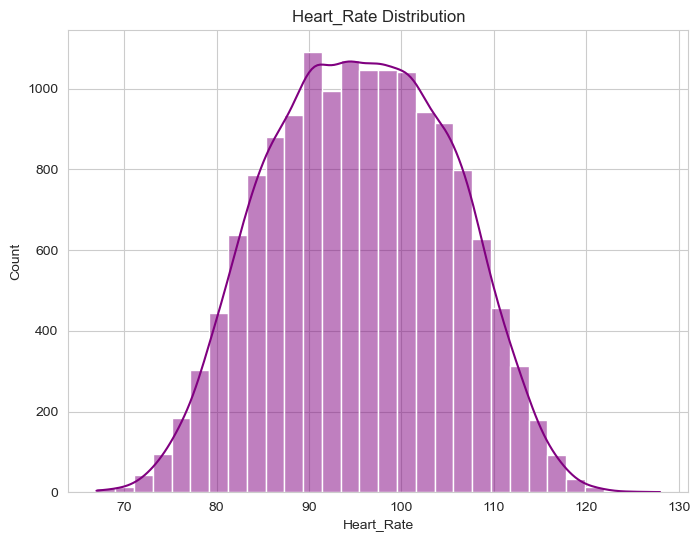

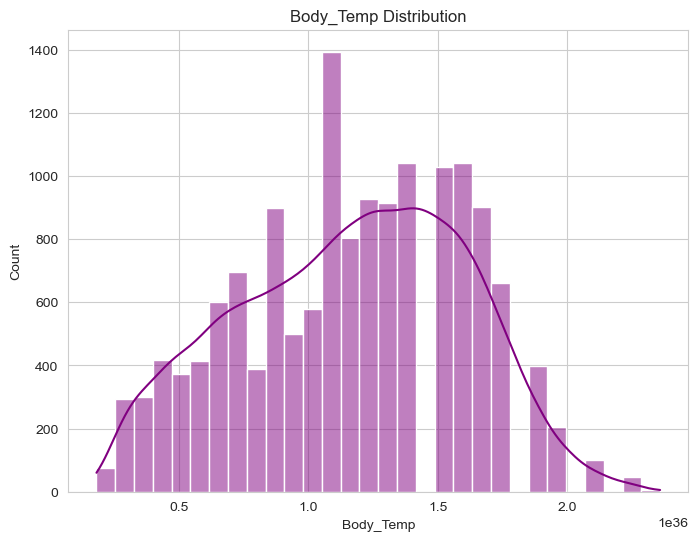

In [33]:
# Histograms for numerical features
numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=30, kde=True,color='purple')
    plt.title(f'{feature} Distribution')
    plt.show()


## BIVARIATE ANALYSIS

In [42]:
# How does age correlates with the calories burned?

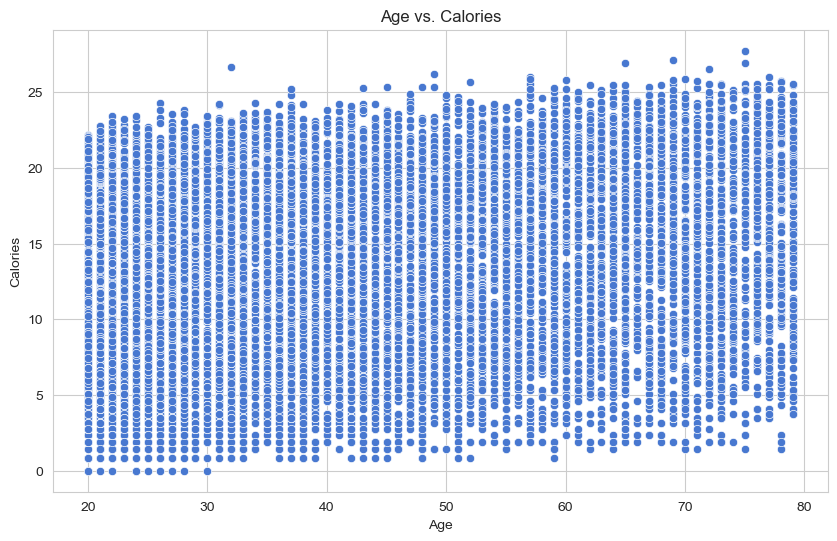

In [43]:
# Scatter plot for Age vs. Calories
plt.figure(figsize=(10, 6))
sns.set_palette('muted')
sns.scatterplot(x='Age', y='Calories', data=data,)
plt.title('Age vs. Calories')
plt.show()


In [44]:
## What is relationship between Heart rate and age?

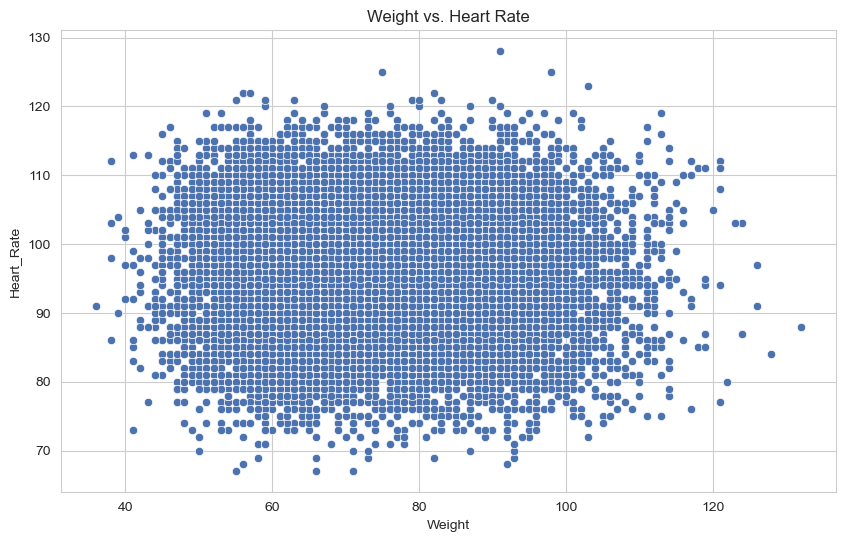

In [45]:
# Scatter plot for Weight vs. Heart Rate
sns.set_palette("deep")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Heart_Rate', data=data,)
plt.title('Weight vs. Heart Rate')
plt.show()


## MULTIVARIATE ANALYSIS

In [46]:
##  Average Calories burned by Gender and Age group

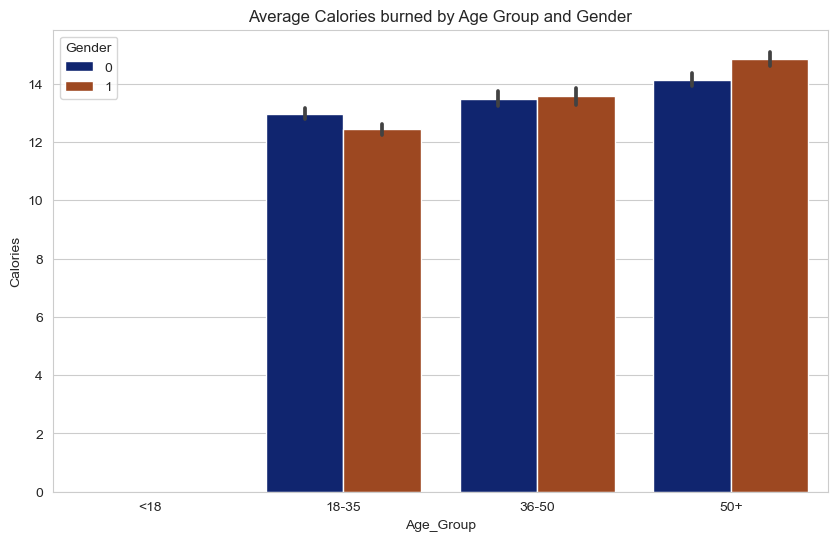

In [34]:
age_groups = pd.cut(data['Age'], bins=[0, 18, 35, 50, 100], labels=['<18', '18-35', '36-50', '50+'])
data['Age_Group'] = age_groups
plt.figure(figsize=(10, 6))
sns.set_palette("dark")
sns.barplot(x='Age_Group', y='Calories', hue='Gender', data=data, estimator=np.mean,)
plt.title('Average Calories burned by Age Group and Gender')
plt.show()


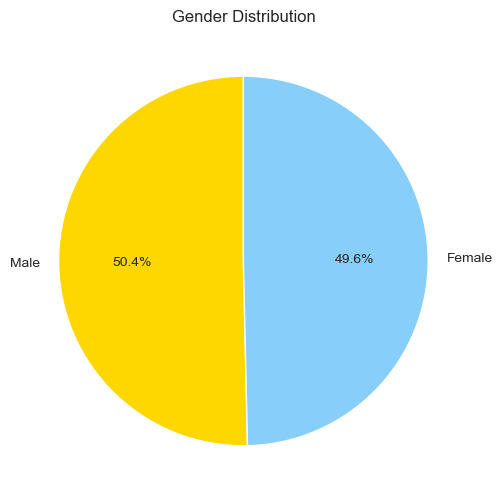

In [35]:
# Pie chart for gender distribution
gender_counts = data['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['gold', 'lightskyblue']  # Specify colors for Male and Female categories

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.show()


In [49]:
# How does the combination of Age, Weight, and Gender affect Calories burned?

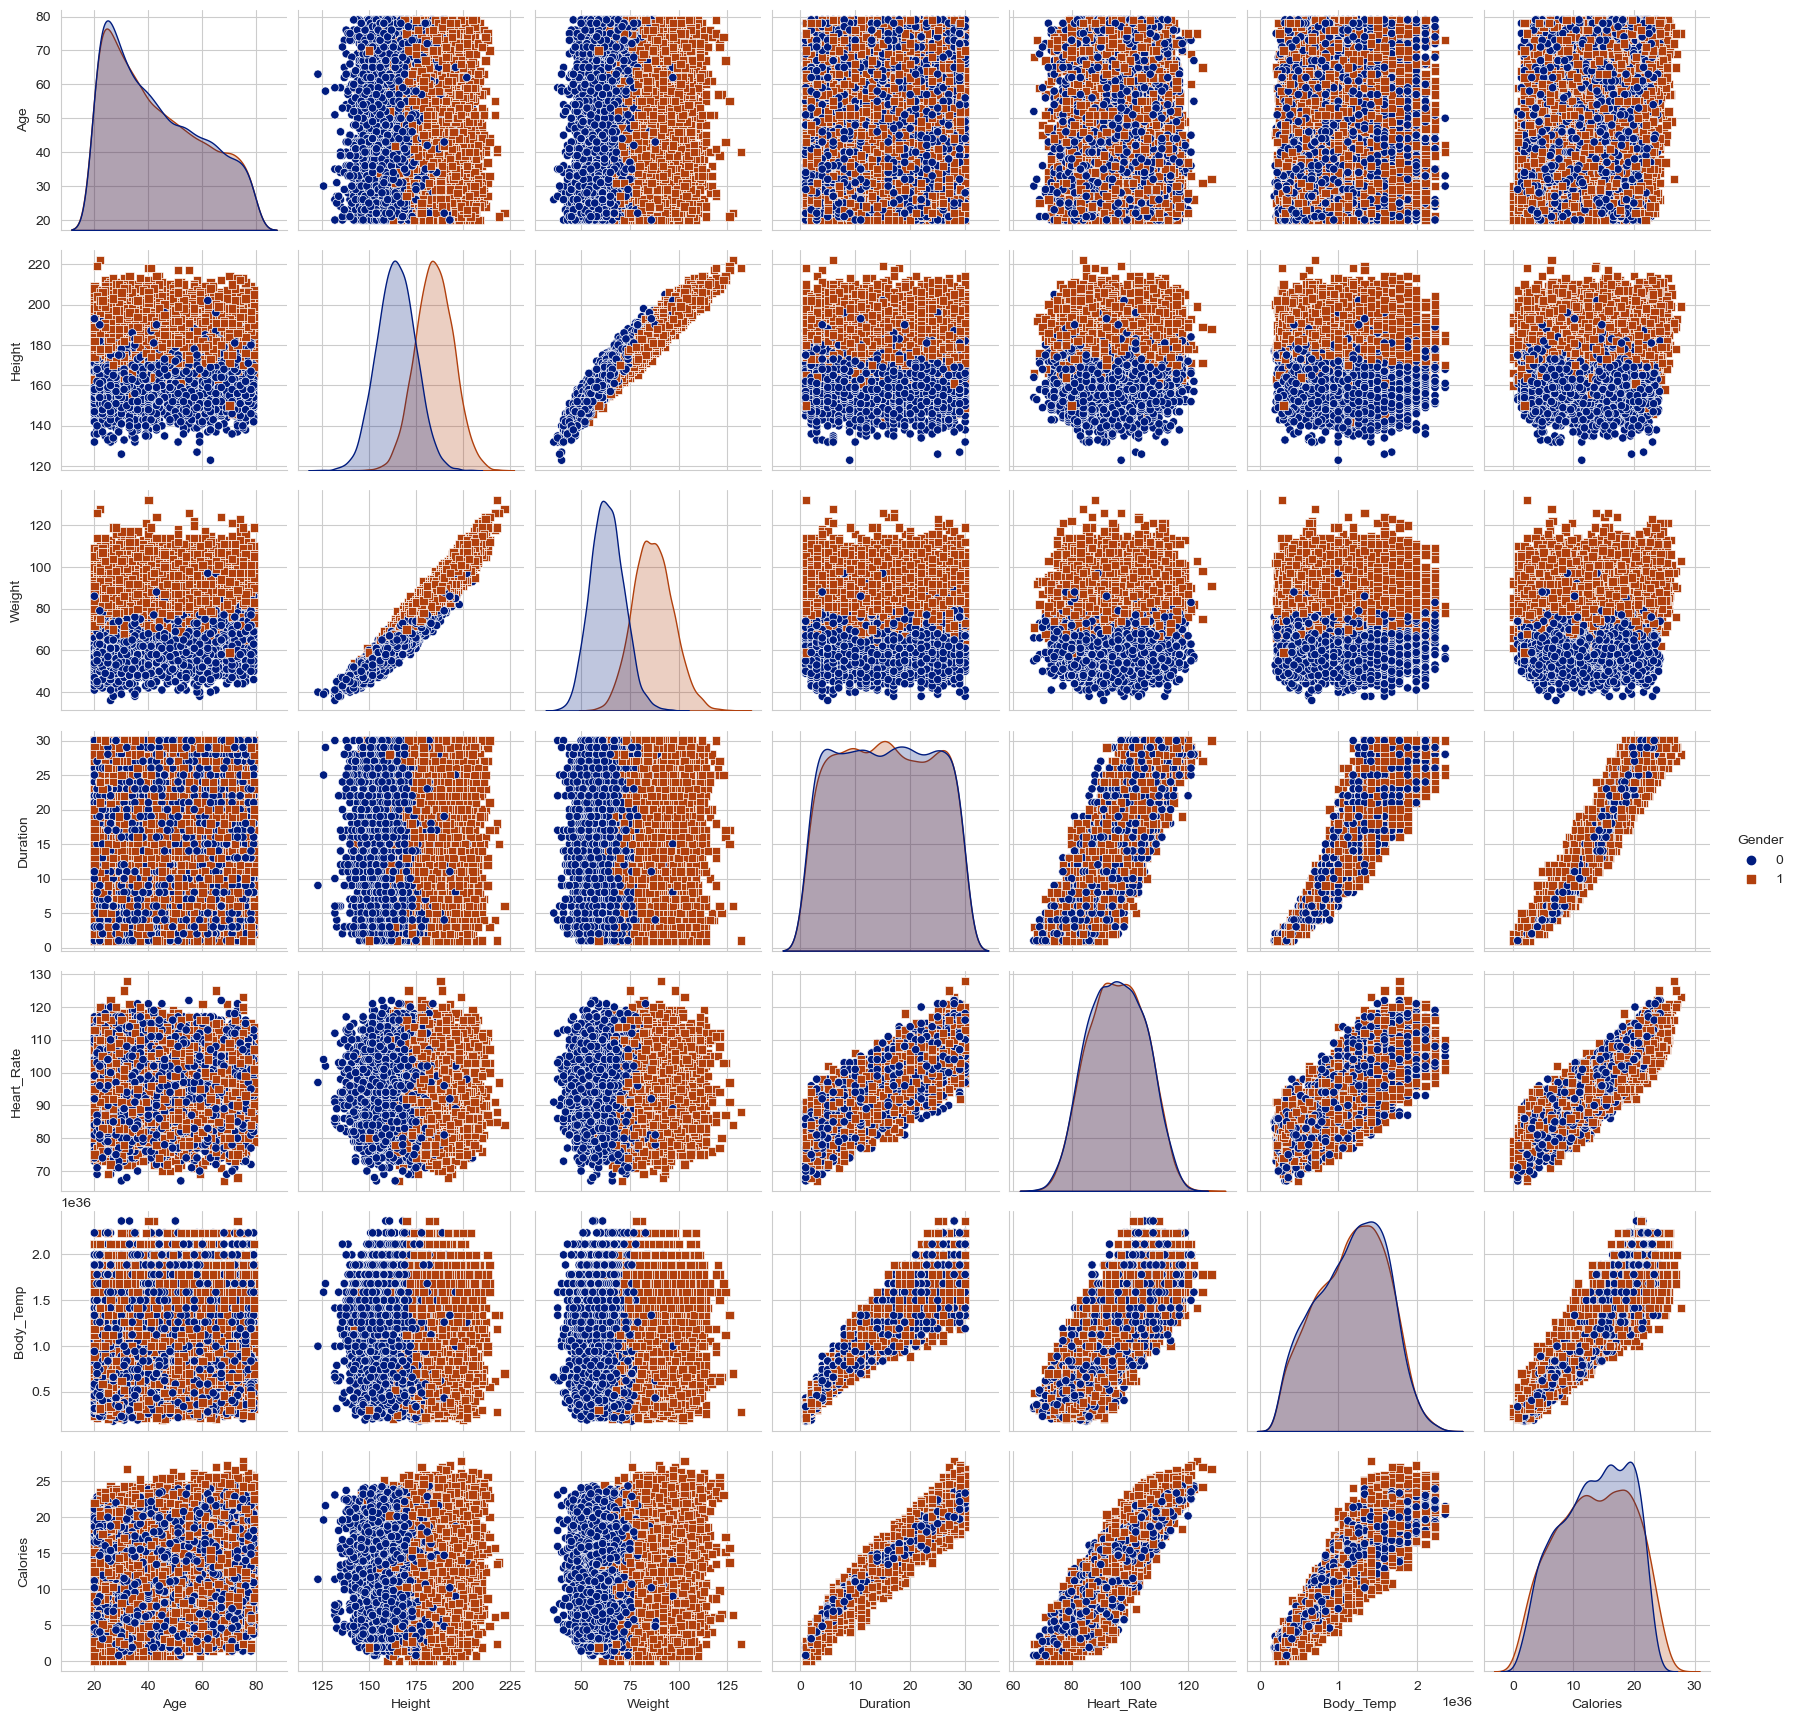

In [38]:
# Pair plot for numerical features and target variable 'Calories'
sns.pairplot(data, vars=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories'], hue='Gender', markers=['o', 's'])
plt.show()

## CHECKING IMBALANCY OF THE DATASET

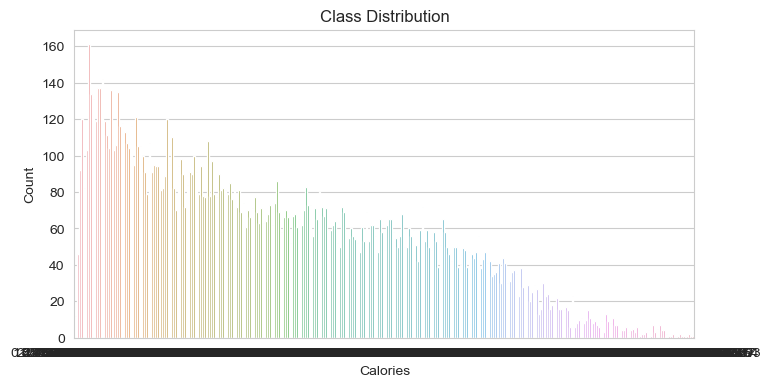

In [37]:
class_counts = data['Calories'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Calories')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [52]:
## The Calories feature in  the dataset is perfectly balanced!.

In [39]:
class_counts = data['Calories'].value_counts()
print("Class Distribution:")
print(class_counts)

# To print percentages:
class_percentages = data['Calories'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(class_percentages)


Class Distribution:
3.125659     161
4.854460     142
4.602652     137
4.339102     137
5.768331     136
            ... 
25.856548      1
27.132606      1
26.228177      1
27.746256      1
26.548623      1
Name: Calories, Length: 277, dtype: int64
Class Distribution (%):
3.125659     1.073333
4.854460     0.946667
4.602652     0.913333
4.339102     0.913333
5.768331     0.906667
               ...   
25.856548    0.006667
27.132606    0.006667
26.228177    0.006667
27.746256    0.006667
26.548623    0.006667
Name: Calories, Length: 277, dtype: float64


## VARIANCE AND COVARIANCE

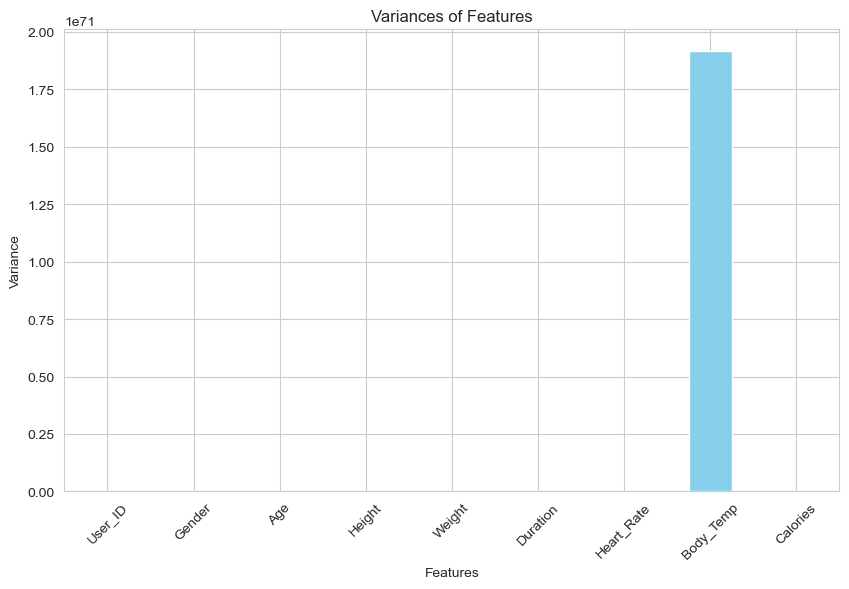

<Axes: >

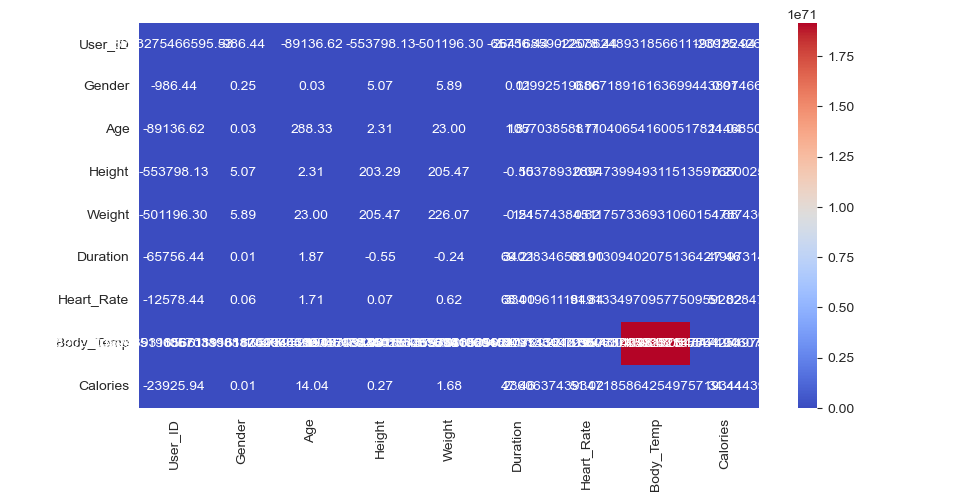

In [40]:
# Calculating variance of each feature
variances = data.var()

# Create a bar chart to visualize variances

plt.figure(figsize=(10, 6))
variances.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variances of Features')
plt.xticks(rotation=45)
plt.show()

# Calculate the covariance matrix
covariance_matrix = data.cov()

# Create a heatmap to visualize the covariance matrix
plt.figure(figsize=(10, 5))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm',  fmt=".2f")

#  FEATURE ENGINEERING

## Feature Generation

In [41]:
# BMI
data['BMI'] = data['Weight'] / (data['Height'] * data['Height'])

# CALORIES_BURN_RATE

data['Caloric_Burn_Rate'] = data['Calories'] / data['Duration']

# WEIGHT STATUS BINS

weight_status_bins = [0, 18.5, 24.9, 29.9, float('inf')]
weight_status_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
data['Weight_Status'] = pd.cut(data['BMI'], bins=weight_status_bins, labels=weight_status_labels)

# INTENSITY OF EXERCISE

intensity_bins = [0, 100, 130, 160, float('inf')]
intensity_labels = ['Low', 'Moderate', 'High', 'Very High']
data['Exercise_Intensity'] = pd.cut(data['Heart_Rate'], bins=intensity_bins, labels=intensity_labels)

# Temperature and Heart Rate Interaction
data['Temp_Heart_Rate'] = data['Body_Temp'] * data['Heart_Rate']

# DURATION CATEGORY

duration_bins = [0, 15, 30, 45, 60, float('inf')]
duration_labels = ['<15 mins', '15-30 mins', '30-45 mins', '45-60 mins', '>60 mins']
data['Duration_Category'] = pd.cut(data['Duration'], bins=duration_bins, labels=duration_labels)


In [42]:
data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate     Body_Temp  \
0  14733363       1   68     190      94        29         105  1.677522e+36   
1  14861698       0   20     166      60        14          94  1.257998e+36   
2  11179863       1   69     179      79         5          88  4.886912e+35   
3  16180408       0   34     179      71        13         100  1.412084e+36   
4  17771927       0   27     154      58        10          81  9.400073e+35   

    Calories Age_Group       BMI  Caloric_Burn_Rate Weight_Status  \
0  23.850945       50+  0.002604           0.822446   Underweight   
1  12.551410     18-35  0.002177           0.896529   Underweight   
2   7.463894       50+  0.002466           1.492779   Underweight   
3  13.048656     18-35  0.002216           1.003743   Underweight   
4   8.860264     18-35  0.002446           0.886026   Underweight   

  Exercise_Intensity  Temp_Heart_Rate Duration_Category  
0           Moderate     1.761398e+38        15-30 mins  
1                Low     1.182518e+38          <15 mins  
2                Low     4.300483e+37          <15 mins  
3                Low     1.412084e+38          <15 mins  
4                Low     7.614059e+37          <15 mins

In [57]:
# CATEGORICAL FEATURES: Weight_Status,Exercise_Intensity

In [58]:
# Applying Label Encoding Technique: Label Encoding

In [43]:
data['Weight_Status'] = label_encoder.fit_transform(data['Weight_Status'])
data['Exercise_Intensity'] = label_encoder.fit_transform(data['Exercise_Intensity'])


In [44]:
data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate     Body_Temp  \
0  14733363       1   68     190      94        29         105  1.677522e+36   
1  14861698       0   20     166      60        14          94  1.257998e+36   
2  11179863       1   69     179      79         5          88  4.886912e+35   
3  16180408       0   34     179      71        13         100  1.412084e+36   
4  17771927       0   27     154      58        10          81  9.400073e+35   

    Calories Age_Group       BMI  Caloric_Burn_Rate  Weight_Status  \
0  23.850945       50+  0.002604           0.822446              0   
1  12.551410     18-35  0.002177           0.896529              0   
2   7.463894       50+  0.002466           1.492779              0   
3  13.048656     18-35  0.002216           1.003743              0   
4   8.860264     18-35  0.002446           0.886026              0   

   Exercise_Intensity  Temp_Heart_Rate Duration_Category  
0                   1     1.761398e+38        15-30 mins  
1                   0     1.182518e+38          <15 mins  
2                   0     4.300483e+37          <15 mins  
3                   0     1.412084e+38          <15 mins  
4                   0     7.614059e+37          <15 mins

## FEATURE IMPORTANCE

###  Using SelectKBest

In [45]:

# Selecting features and target variable
features = data[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI', 'Caloric_Burn_Rate', 'Weight_Status', 'Exercise_Intensity']]
target = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Use SelectKBest to select the top k features based on f_regression score
k = 5  # You can change the value of k as needed
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the selected features
rf.fit(X_train_selected, y_train)

# Make predictions on the test set
predictions = rf.predict(X_test_selected)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = features.columns[selected_feature_indices]

# Print the names of the selected features
print(f"Selected features: {selected_features}")


Mean Squared Error: 0.0022221067298130843
Selected features: Index(['Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate',
       'Exercise_Intensity'],
      dtype='object')


###  Using SelectPercentile

In [46]:

# Selecting features and target variable
features = data[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI', 'Caloric_Burn_Rate', 'Weight_Status', 'Exercise_Intensity']]
target = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Use SelectPercentile with mutual_info_regression score function
percentile = 50  # You can change the percentile value as needed
selector = SelectPercentile(score_func=mutual_info_regression, percentile=percentile)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the selected features
rf.fit(X_train_selected, y_train)

# Make predictions on the test set
predictions = rf.predict(X_test_selected)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = features.columns[selected_feature_indices]

# Print the names of the selected features
print(f"Selected features: {selected_features}")


Mean Squared Error: 0.0022221067298130843
Selected features: Index(['Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate',
       'Exercise_Intensity'],
      dtype='object')


 CONCLUSION:As SelectKBest and SelectPercentile of mutual_info_regression score function gives the same Mean Squared Error
          'Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate','Exercise_Intensity'
           These features are taken in consideration to build a Regression model for Calories Burn Prediction.   

## MODEL BUILDING

In [47]:
# Dataframe to store metrics.
i = 0
eval_metrics = pd.DataFrame()

In [49]:

eval_metrics

Empty DataFrame
Columns: []
Index: []

### LINEAR REGRESSION

In [51]:
# Selecting features and target variable
features = data[['Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate', 'Exercise_Intensity']]
target = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = linear_reg_model.predict(X_test)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# You can also print coefficients and intercept if needed
print("Coefficients:", linear_reg_model.coef_)
print("Intercept:", linear_reg_model.intercept_)


Mean Squared Error: 5.319258981895135
Coefficients: [ 2.49816444e-70  0.00000000e+00  1.22892300e-35 -5.76943856e-72
  9.86844927e-72]
Intercept: -0.8616399278180449


In [52]:
train_score = linear_reg_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = linear_reg_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')

The train data accuracy is 84.34328720939234
The test data accuracy is 84.94209675605737


In [55]:
# Evaluation metrics.
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [56]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metrics.loc[i, "Model_Name"] = 'Lasso Regression'
eval_metrics.loc[i, "MSE"] = round(mse, 4)
eval_metrics.loc[i, "MAE"] = round(mae, 2)
eval_metrics.loc[i, "RMSE"] = round(rmse, 4)
eval_metrics.loc[i, "R_squared"] = round(r2, 4)

## RIDGE REGRESSION

In [61]:
# Selecting features and target variable
features = data[['Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate', 'Exercise_Intensity']]
target = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Ridge Regression model
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions for train and test datasets
train_predictions = ridge_model.predict(X_train)
test_predictions = ridge_model.predict(X_test)

# Calculate metrics for train dataset
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate metrics for test dataset
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(train_mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print("\nRidge Regression Test Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")



Ridge Regression Test Metrics:
Mean Squared Error (MSE): 1.0212182333000437
Root Mean Squared Error (RMSE): 1.0244895120647604
Mean Absolute Error (MAE): 0.7975579658044085
R-squared (R2): 0.9710910760308507


In [85]:
train_score = ridge_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = ridge_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')

The train data accuracy is 96.93205185731915
The test data accuracy is 97.10910760308506


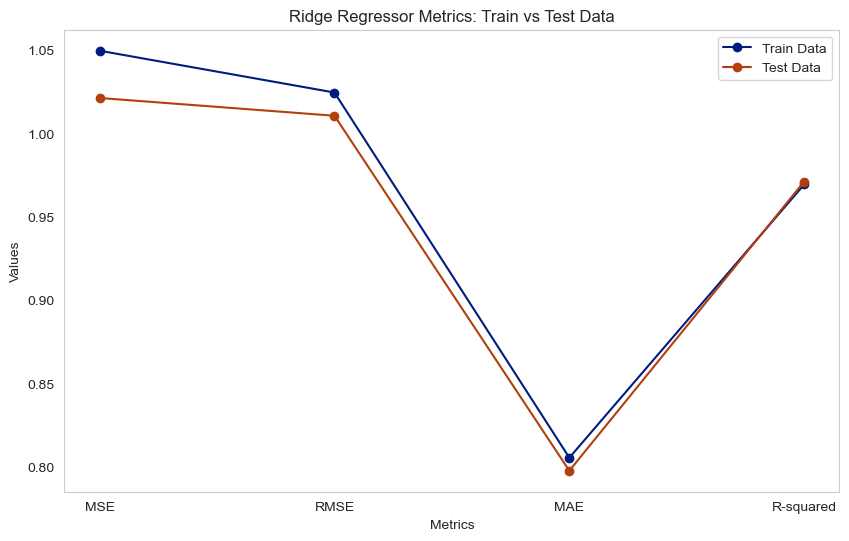

In [86]:
# Visualization - Line graph comparing metrics between training and test data
labels = ['MSE', 'RMSE', 'MAE', 'R-squared']
train_metrics = [train_mse, train_rmse, train_mae, train_r2]
test_metrics = [test_mse, test_rmse, test_mae, test_r2]

x = np.arange(len(labels))  # the label locations

plt.figure(figsize=(10, 6))
plt.plot(labels, train_metrics, marker='o', label='Train Data')
plt.plot(labels, test_metrics, marker='o', label='Test Data')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Ridge Regressor Metrics: Train vs Test Data')
plt.legend()
plt.grid()
plt.show()
     

In [87]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metrics.loc[i,"Model_Name"]='Ridge regression'
eval_metrics.loc[i,"MSE"]=round(mse,4)
eval_metrics.loc[i,"MAE"]=round(mae,2)
eval_metrics.loc[i,"RMSE"]=round(rmse,4)
eval_metrics.loc[i,"R_squared"]=round(r2,4)

i=i+1
     

## LASSO REGRESSION

In [88]:
# Selecting features and target variable
features = data[['Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate', 'Exercise_Intensity']]
target = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Lasso Regression model
alpha = 1.0
lasso_model = Lasso(alpha=alpha)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions for train and test datasets
train_predictions = lasso_model.predict(X_train)
test_predictions = lasso_model.predict(X_test)

# Calculate metrics for train dataset
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate metrics for test dataset
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(test_mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

# Print performance metrics
print("\nLasso Regression Test Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R-squared (R2): {test_r2}")



Lasso Regression Test Metrics:
Mean Squared Error (MSE): 1.0212182333000437
Root Mean Squared Error (RMSE): 1.0105534292159142
Mean Absolute Error (MAE): 0.7975579658044085
R-squared (R2): 0.9710910760308507


In [89]:
test_score = lasso_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')
train_score = lasso_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')


The test data accuracy is 96.65255384088486
The train data accuracy is 96.46889930868431


In [ ]:
# COMPARING TRAIN AND TEST DATA

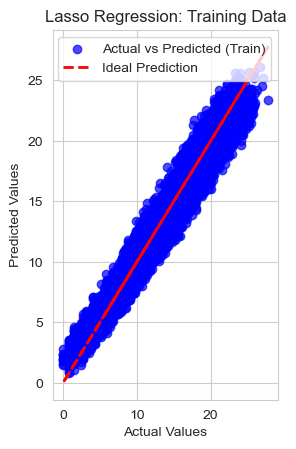

In [90]:
# Plotting actual vs predicted for training dataset
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted (Train)', alpha=0.7)
plt.plot(y_train,y_train,color='red', linestyle='--', linewidth=2, label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Training Data')
plt.legend()

In [92]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metrics.loc[i,"Model_Name"]='Lasso Regression'
eval_metrics.loc[i,"MSE"]=round(mse,4)
eval_metrics.loc[i,"MAE"]=round(mae,2)
eval_metrics.loc[i,"RMSE"]=round(rmse,4)
eval_metrics.loc[i,"R_squared"]=round(r2,4)

i=i+1

## Decision Tree Regressor

In [93]:
# Selecting features and target variable
features = data[['Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate', 'Exercise_Intensity']]
target = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
predictions = decision_tree_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("Decision Tree Regressor Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Decision Tree Regressor Metrics:
MSE: 0.005140770419886467
RMSE: 0.07169916610314563
MAE: 0.014633013841669571
R-squared: 0.9998544736704014


In [114]:
# Initialize Decision Tree model with post-pruning (limiting the depth)
max_depth = 10  # You can adjust this value based on your preference
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=max_depth)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
predictions = decision_tree_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("Decision Tree Regressor Metrics (with post-pruning):")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Decision Tree Regressor Metrics (with post-pruning):
MSE: 0.01353791389452813
RMSE: 0.11635254141843285
MAE: 0.0697517714386915
R-squared: 0.9996167650452018


In [115]:
train_score = decision_tree_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = linear_reg_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')


The train data accuracy is 99.97772166760396
The test data accuracy is 84.94209675605737


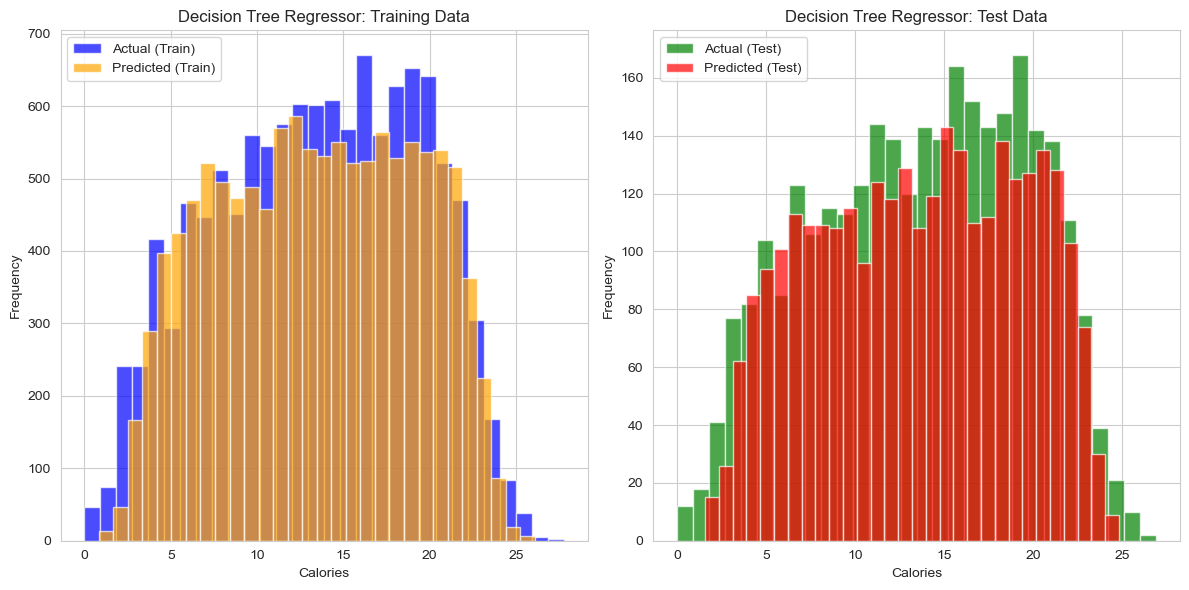

In [95]:
# Visualization
plt.figure(figsize=(12, 6))

# Plotting histograms for training dataset
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, color='blue', label='Actual (Train)')
plt.hist(train_predictions, bins=30, alpha=0.7, color='orange', label='Predicted (Train)')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Decision Tree Regressor: Training Data')
plt.legend()

# Plotting histograms for test dataset
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, color='green', label='Actual (Test)')
plt.hist(test_predictions, bins=30, alpha=0.7, color='red', label='Predicted (Test)')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Decision Tree Regressor: Test Data')
plt.legend()

plt.tight_layout()
plt.show()


In [96]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metrics.loc[i,"Model_Name"]='Decision Tree regression'
eval_metrics.loc[i,"MSE"]=round(mse,4)
eval_metrics.loc[i,"MAE"]=round(mae,2)
eval_metrics.loc[i,"RMSE"]=round(rmse,4)
eval_metrics.loc[i,"R_squared"]=round(r2,4)

i=i+1

## RANDOM FOREST REGRESSOR

In [97]:
# Selecting features and target variable
features = data[['Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate', 'Exercise_Intensity']]
target = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
predictions = random_forest_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("Random Forest Regressor Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

Random Forest Regressor Metrics:
MSE: 0.0022221067298130843
RMSE: 0.04713922708120154
MAE: 0.011666618481695427
R-squared: 0.9999370959973013


In [98]:
train_score = random_forest_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score =random_forest_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')


The train data accuracy is 99.99882107868545
The test data accuracy is 99.99370959973012


In [ ]:
# Visualization
plt.figure(figsize=(12, 6))

# Plotting histograms for training dataset
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, color='blue', label='Actual (Train)')
plt.hist(train_predictions, bins=30, alpha=0.7, color='orange', label='Predicted (Train)')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Random Forest Model: Training Data')
plt.legend()

# Plotting histograms for test dataset
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, color='green', label='Actual (Test)')
plt.hist(test_predictions, bins=30, alpha=0.7, color='red', label='Predicted (Test)')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Random Forest Model: Test Data')
plt.legend()

plt.tight_layout()
plt.show()

In [99]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metrics.loc[i,"Model_Name"]='Random Forest Regressor'
eval_metrics.loc[i,"MSE"]=round(mse,4)
eval_metrics.loc[i,"MAE"]=round(mae,2)
eval_metrics.loc[i,"RMSE"]=round(rmse,4)
eval_metrics.loc[i,"R_squared"]=round(r2,4)

i=i+1

##  SUPPORT VECTOR REGRESSOR

In [102]:

# Selecting features and target variable
features = data[['Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate', 'Exercise_Intensity']]
target = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize SVR model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
predictions = svr_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("SVR Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

SVR Metrics:
MSE: 4.82896343936814
RMSE: 2.197490259220309
MAE: 1.7063858524092355
R-squared: 0.8633003873546397


In [106]:
train_score = svr_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = svr_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')

The train data accuracy is 85.76427643608633
The test data accuracy is 86.33003873546397


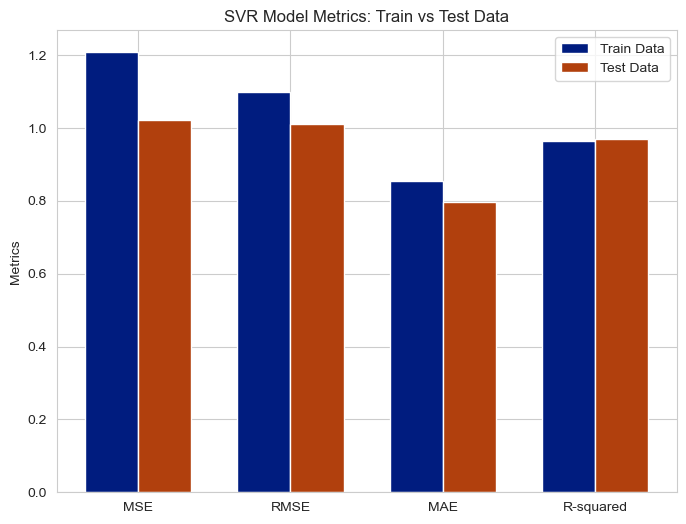

In [107]:
# Visualization - Grouped bar chart comparing metrics between training and test data
labels = ['MSE', 'RMSE', 'MAE', 'R-squared']
train_metrics = [train_mse, train_rmse, train_mae, train_r2]
test_metrics = [test_mse, test_rmse, test_mae, test_r2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_metrics, width, label='Train Data')
rects2 = ax.bar(x + width/2, test_metrics, width, label='Test Data')

ax.set_ylabel('Metrics')
ax.set_title('SVR Model Metrics: Train vs Test Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [108]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metrics.loc[i,"Model_Name"]='SVR'
eval_metrics.loc[i,"MSE"]=round(mse,4)
eval_metrics.loc[i,"MAE"]=round(mae,2)
eval_metrics.loc[i,"RMSE"]=round(rmse,4)
eval_metrics.loc[i,"R_squared"]=round(r2,4)

i=i+1

## GRADIENT BOOSTING REGRESSOR

In [101]:

# Selecting features and target variable
features = data[['Duration', 'Heart_Rate', 'Body_Temp', 'Caloric_Burn_Rate', 'Exercise_Intensity']]
target = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("Gradient Boosting Regressor Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

Gradient Boosting Regressor Metrics:
MSE: 4.82896343936814
RMSE: 2.197490259220309
MAE: 1.7063858524092355
R-squared: 0.8633003873546397


In [103]:
train_score = gradient_boosting_model.score(X_train, y_train) * 100
print(f'The train data accuracy is {train_score}')

test_score = gradient_boosting_model.score(X_test, y_test)*100
print(f'The test data accuracy is {test_score}')

The train data accuracy is 99.63847499030032
The test data accuracy is 99.63982335213555


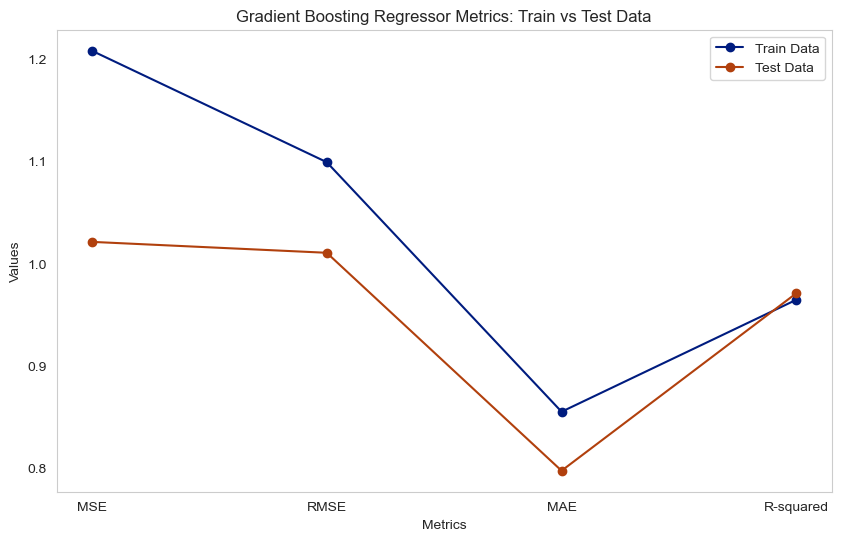

In [104]:
# Visualization - Line graph comparing metrics between training and test data
labels = ['MSE', 'RMSE', 'MAE', 'R-squared']
train_metrics = [train_mse, train_rmse, train_mae, train_r2]
test_metrics = [test_mse, test_rmse, test_mae, test_r2]

x = np.arange(len(labels))  # the label locations

plt.figure(figsize=(10, 6))
plt.plot(labels, train_metrics, marker='o', label='Train Data')
plt.plot(labels, test_metrics, marker='o', label='Test Data')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Gradient Boosting Regressor Metrics: Train vs Test Data')
plt.legend()
plt.grid()
plt.show()
     

In [105]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metrics.loc[i,"Model_Name"]='Gradient Boosting Regressor'
eval_metrics.loc[i,"MSE"]=round(mse,4)
eval_metrics.loc[i,"MAE"]=round(mae,2)
eval_metrics.loc[i,"RMSE"]=round(rmse,4)
eval_metrics.loc[i,"R_squared"]=round(r2,4)

i=i+1

## Metrics comparison

In [109]:
#  Sorting the eval_metrics table in ascending manner based on value of MSE

sorted_metrics = eval_metrics.sort_values(by = ["MSE"], ascending = True)
sorted_metrics

Model_Name     MSE   MAE    RMSE  R_squared
4      Random Forest Regressor  0.0022  0.01  0.0471     0.9999
3     Decision Tree regression  0.0051  0.01  0.0717     0.9999
0             Ridge regression  1.0212  0.80  1.0106     0.9711
1             Lasso Regression  1.1825  0.85  1.0106     0.9665
2             Lasso Regression  1.1825  0.85  1.0106     0.9665
5  Gradient Boosting Regressor  4.8290  1.71  2.1975     0.8633
6                          SVR  4.8290  1.71  2.1975     0.8633


Accuracy based on different models:
    
    Linear regression:       - Test_data =84.94209 , Train_data =84.3432
        
    Ridge  regressor         - Test_data =97.109 , Train_data = 96.9320
    
    Lasso regressor          - Test_data = 96.6525, Train_data = 96.4688
    
    Randon Forest Regressor  - Test_data =  99.9937, Train_data =99.9988
    
    Decision Tree Regressor  - Test_data = 84.9420, Train_data = 99.977
    
    SVR                      - Test_data =  86.330, Train_data =85.764
    
    Gradient Boost regressor - Test_data = 99.6398 , Train_data = 99.6384

    

The Random Forest Regressor has given the better prediction than other ML models.

## CONCLUSION 

The  analysis from  above ML models produces more accurate findings. Mean absolute error suggests 
that absolute error should be as minimal as possible. It is nothing more than the discrepancy between values that were 
seen and those that were predicted by models. 2.2 is a good value for the mean absolute value that the Random Forest Regressor 
gives us. The mistake rates are quite low. Therefore, we can say that Random Forest Regressor is the best model for 
predicting calorie burn. The flexibility of the suggested technique can also be improved with variations. We have concentrated on the 5  primary factors that influence how many calories our body burns, but 
there are other factors that also play a role. It's also crucial to understand how many calories we are consuming if we
want to stay healthy and fit.